# KNN Algorithm for Yeast Data


In [13]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd  
from math import floor, ceil, sqrt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [14]:
def the_train_test_split(X, test_ratio = 0.2):
    if(test_ratio >= 1 or test_ratio <0):
        test_ratio = 0.2
    row, _ = X.shape
    train_count = floor(row * (1-test_ratio)) 
    train = X[:train_count]
    test = X[train_count:]
    return train, test

In [15]:
def euclidean_distance(x,y):
    return sqrt(sum(np.square(x-y)))

def minkowski_distance(x,y):
    return -1;

def get_distance(x, y, algorithm ="euclidean"):
    if(algorithm == "euclidean"):
        return euclidean_distance(x,y)
    else:
        print("The algorithm ", algorithm, " couldn't be recognized.\n", "\"euclidean\" algorithm is used instead")
        return euclidean_distance(x,y)

In [16]:
class K_Neigbours_Classifier():
    def __init__(self, neigbour_count = 7, algorithm = "euclidean"):
        self.alg = algorithm
        self.n_count = neigbour_count

    def fit(self, train_input, train_output):
        self.train_in = train_input
        self.train_out = train_output
        #
        pd.unique(self.train_out) # since it is array of arrays sized 1
        self.categories = pd.unique(self.train_out.ravel())
    
    def predict(self, single):
        # calculate the distances
        distances = np.apply_along_axis(get_distance, 1, self.train_in, y=single, algorithm=self.alg)
        #print(distances)
        nearest_indices = np.argpartition(distances, self.n_count)[:self.n_count]
        #print(nearest_indices)
        category_dict = dict.fromkeys(self.categories, 0)
        nearest_keys = self.train_out[nearest_indices]
        for neigbour_key in nearest_keys:
            category_dict[neigbour_key] = 1 + category_dict[neigbour_key]
        the_key_with_max = max(category_dict, key=category_dict.get)
        #print("We predict this one to be: ", the_key_with_max)
        return the_key_with_max

In [17]:
def measure(X_train, Y_train, X_test, Y_test  ):
    knc = K_Neigbours_Classifier(neigbour_count=13)
    knc.fit(X_train, Y_train[:,0]) # we know that y_train is 1 dimensional 
    correct_pred = 0
    incorrect_pred = 0
    correct_pred_dict = dict.fromkeys(cat,0)
    failed_to_pred_dict = dict.fromkeys(cat,0)
    assumed_to_pred_dict = dict.fromkeys(cat,0)

    predictions = [] #= np.empty(Y_test.size,  dtype="S3")
    for i in range (Y_test.size):
        correct_key = Y_test[i][0]
        predicted_key =knc.predict(X_test[i])
        predictions.append(predicted_key)
        if(  predicted_key== correct_key):
            correct_pred = 1 + correct_pred
            correct_pred_dict[correct_key] = 1 + correct_pred_dict[correct_key]

        else:
            incorrect_pred = 1 + incorrect_pred
            failed_to_pred_dict[correct_key] = 1 + failed_to_pred_dict[correct_key]
            assumed_to_pred_dict[predicted_key] = 1 + assumed_to_pred_dict[predicted_key] 
            
    print("Accuracy: ", correct_pred/(correct_pred + incorrect_pred) )
    print("Number of correct predictions: ", correct_pred)
    print("Number of incorrect predictions: ", incorrect_pred)
    print("correct predict(ion) count:\n", correct_pred_dict)
    print("failed_to predict(ion) count:\n", failed_to_pred_dict)
    print("assumed_to predict(ion) count:\n", assumed_to_pred_dict)
    

    print("\n                   Classification Report                  \n",
    classification_report(Y_test, predictions, zero_division=1)) # ignores zero division warning
    
    ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
    plt.show()


## Read the data

In [18]:
file_name = "yeast.csv" 
md = pd.read_csv(file_name)

# md.dropna(inplace = True)
# md.replace('unknown', 0, inplace = True)
md.head()


,ADT1_YEAST,0.58,0.61,0.47,0.13,0.50,0.00,0.48,0.22,MIT
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT


## Prepare the data
* Separate the input and output variables
* Seperate the data into training and test sets
* Normalize the data


In [19]:
test_ratio = 0.2
X = md.values[:,1:9]
Y = md.values[:,9:]
cat = pd.unique(Y[:,0])

# normalize X:
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()


In [20]:
X_train, X_test = the_train_test_split(X, test_ratio = test_ratio)
Y_train, Y_test = the_train_test_split(Y, test_ratio = test_ratio)

Accuracy:  0.5622895622895623
Number of correct predictions:  167
Number of incorrect predictions:  130
correct predict(ion) count:
 {'MIT': 8, 'NUC': 45, 'CYT': 56, 'ME1': 15, 'EXC': 4, 'ME2': 2, 'ME3': 35, 'VAC': 0, 'POX': 2, 'ERL': 0}
failed_to predict(ion) count:
 {'MIT': 14, 'NUC': 20, 'CYT': 46, 'ME1': 6, 'EXC': 2, 'ME2': 6, 'ME3': 19, 'VAC': 15, 'POX': 2, 'ERL': 0}
assumed_to predict(ion) count:
 {'MIT': 25, 'NUC': 53, 'CYT': 37, 'ME1': 4, 'EXC': 3, 'ME2': 5, 'ME3': 3, 'VAC': 0, 'POX': 0, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.60      0.55      0.57       102
         EXC       0.57      0.67      0.62         6
         ME1       0.79      0.71      0.75        21
         ME2       0.29      0.25      0.27         8
         ME3       0.92      0.65      0.76        54
         MIT       0.24      0.36      0.29        22
         NUC       0.46      0.69      0.55      

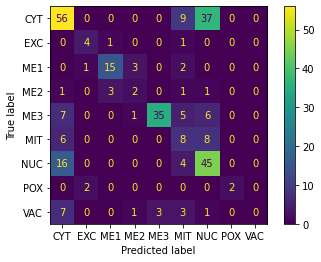

In [21]:
measure(X_train, Y_train, X_test, Y_test)

### PCA pretest VIA Sci-Kit LEARN


Accuracy:  0.5185185185185185
Number of correct predictions:  154
Number of incorrect predictions:  143
correct predict(ion) count:
 {'MIT': 8, 'NUC': 39, 'CYT': 54, 'ME1': 13, 'EXC': 4, 'ME2': 0, 'ME3': 34, 'VAC': 0, 'POX': 2, 'ERL': 0}
failed_to predict(ion) count:
 {'MIT': 14, 'NUC': 26, 'CYT': 48, 'ME1': 8, 'EXC': 2, 'ME2': 8, 'ME3': 20, 'VAC': 15, 'POX': 2, 'ERL': 0}
assumed_to predict(ion) count:
 {'MIT': 26, 'NUC': 60, 'CYT': 39, 'ME1': 2, 'EXC': 6, 'ME2': 6, 'ME3': 4, 'VAC': 0, 'POX': 0, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.58      0.53      0.55       102
         EXC       0.40      0.67      0.50         6
         ME1       0.87      0.62      0.72        21
         ME2       0.00      0.00      0.00         8
         ME3       0.89      0.63      0.74        54
         MIT       0.24      0.36      0.29        22
         NUC       0.39      0.60      0.48      

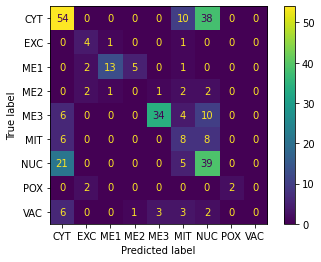

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X = pca.fit_transform(X)

X_train, X_test = the_train_test_split(X, test_ratio = test_ratio)
Y_train, Y_test = the_train_test_split(Y, test_ratio = test_ratio)

measure(X_train, Y_train, X_test, Y_test)

